# This notebook is for an example of how to use XCast for individual GCM evaluaiton

In this example using two NMME model and CHIRPS data as reference for preciptation forecast for East Africa

Created by Nachiketa Acharya on Nov,2023

### Import Librarires

In [1]:
import xcast as xc 
import xarray as xr 
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
print('XCAST VERSION: ', xc.__version__)

XCAST VERSION:  0.6.9


### Read downloded Observed data

Read your donwloded or own observed data. For example, I have donwloeded CHIRPS(Oct-Nov-Dec avaergare from 1982-2021 for 5S-25N,15E-55E)Y 
from IRI DL using the below link.However,anyone can donwloded data from any webpage
data downlowed from IRI data library link :https://iridl.ldeo.columbia.edu/SOURCES/.UCSB/.CHIRPS/.v2p0/.daily-improved/.global/.0p25/.prcp/T/%28Jan%201982%29/%28Dec%202022%29/RANGE/T/%28Oct-Dec%29/seasonalAverage/Y/%285S%29/%2825N%29/RANGEEDGES/X/%2815E%29/%2855E%29/RANGEEDGES/#expert

In [2]:
obs = xr.open_dataset('CHIRPS_OND_1982_2021.nc',decode_times=False).prcp.expand_dims({'M':[0]},axis=1)#As XCast handle only 4 dimesion data, we need to add one extra dimesion in Observed data. Here, we add "M" dimension in second axis. This is only for data downloded from IRI Data library as they have this issue
obs.dims


('T', 'M', 'Y', 'X')

### Read downloded NMME data

Read your donwloded NMME data from anywhere.For example, I have donwloeded CFS and CCSM4 hindcast data(lead -1,Sep Start Oct-Nov-Dec avaergare from 1982-2021 for 5S-25N,15E-55E)and forecast (lead -1,Sep Start Oct-Nov-Dec avaergare for 2023)  from IRI DL using the below links.However,anyone can donwloded data from any webpage data downlowed from IRI data library link

data downlowed links :

CFS hindcast: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/a:/.HINDCAST/.PENTAD_SAMPLES/.MONTHLY/.prec/:a:/.FORECAST/.PENTAD_SAMPLES/.MONTHLY/.prec/:a/appendstream/S/%280000%201%20Sep%201982-2021%29/VALUES/L/0.5/3.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/%285S%29/%2825N%29/RANGEEDGES/X/%2815E%29/%2855E%29/RANGEEDGES/M/%281%29/%2824%29/RANGE/%5BM%5Daverage/index.html#expert

CFS forecast: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.PENTAD_SAMPLES/.MONTHLY/.prec/S/%280000%201%20Sep%202023%29/VALUES/L/0.5/3.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/%285S%29/%2825N%29/RANGEEDGES/X/%2815E%29/%2855E%29/RANGEEDGES/%5BM%5Daverage/#expert

CCSM4 hindcast: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.prec/S/%280000%201%20Sep%201982-2021%29/VALUES/L/0.5/3.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/%285S%29/%2825N%29/RANGEEDGES/X/%2815E%29/%2855E%29/RANGEEDGES/%5BM%5Daverage/#expert

CCSM4 forecast: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.prec/S/%280000%201%20Sep%202023%29/VALUES/L/0.5/3.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/%285S%29/%2825N%29/RANGEEDGES/X/%2815E%29/%2855E%29/RANGEEDGES/%5BM%5Daverage/#expert


In [3]:
##reading Hindcast

model1_h = xr.open_dataset('CFSv2_SepIC_OND_1982_2021_prc_EA.nc',decode_times=False).prec

model1_h= model1_h.rename({'L':'M'})


model2_h = xr.open_dataset('CCSM4_SepIC_OND_1982_2021_prc_EA.nc',decode_times=False).prec

model2_h= model2_h.rename({'L':'M'})


predictor_names=['CFSv2','CCSM4']

Model_hindcast = xr.concat([model1_h,model2_h], 'M').assign_coords({'M': predictor_names})

Model_hindcast.dims


('S', 'M', 'Y', 'X')

### Match the resolution of Model and Observed data

In [4]:
Model_hindcast = xc.regrid(Model_hindcast,obs.X,obs.Y)

In [5]:
obs.dims

('T', 'M', 'Y', 'X')

In [6]:
Model_hindcast.dims

('M', 'S', 'Y', 'X')

### Plot Climatology and Inter-annual variability of Observed data

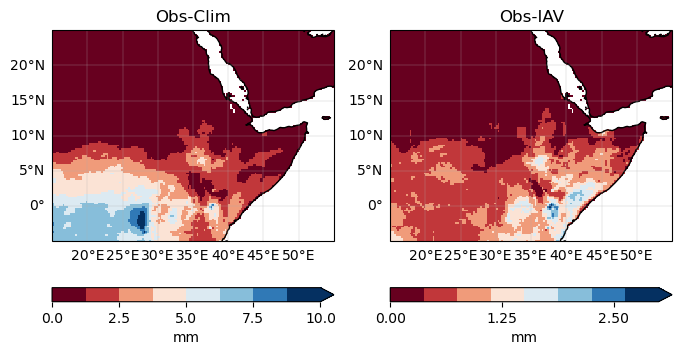

In [7]:
clim=obs.mean('T')
IAV=obs.std('T')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})



clim.plot(ax=ax[0], cbar_kwargs={'label':'mm','orientation':'horizontal','ticks':np.linspace(0,10,5)},cmap=plt.get_cmap('RdBu',8),vmin=0,vmax=10)

ax[0].coastlines()
t = ax[0].set_title('Obs-Clim')
t1=ax[0].gridlines(draw_labels=True, linewidth=0.2)
t1.right_labels=False
t1.top_labels=False


IAV.plot(ax=ax[1], cbar_kwargs={'label':'mm','orientation':'horizontal','ticks':np.linspace(0,10,9)},cmap=plt.get_cmap('RdBu',8),vmin=0,vmax=3)

ax[1].coastlines()
c = ax[1].set_title('Obs-IAV')
c1=ax[1].gridlines(draw_labels=True, linewidth=0.2)
c1.right_labels=False
#c1.left_labels=False
c1.top_labels=False



### Plot Climatology and Inter-annual variability of GCMs

/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/2426240738.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i,ax in  enumerate(xplot.axes.flat):
/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/2426240738.py:14: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i,ax in  enumerate(xplot.axes.flat):


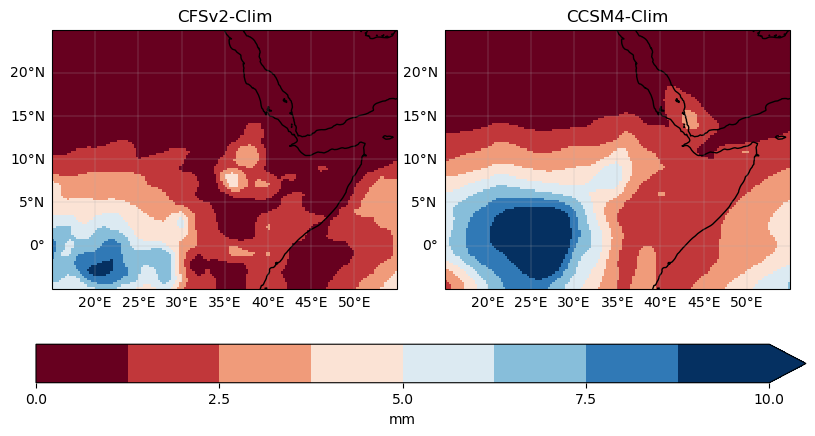

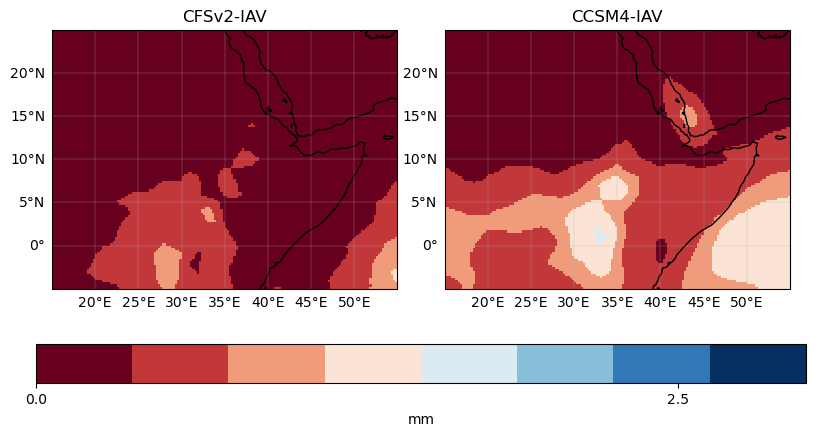

In [8]:

xplot = Model_hindcast.mean('S').plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},cbar_kwargs={'label':'mm','orientation':'horizontal','ticks':np.linspace(0,10,5)},cmap=plt.get_cmap('RdBu',8),figsize=(8,4),vmin=0,vmax=10)

for i,ax in  enumerate(xplot.axes.flat):
    ax.coastlines()
    ax.set_title((predictor_names[i]+ '-Clim'))
    c = ax.gridlines(draw_labels=True, linewidth=0.2)
    c.right_labels=False
    c.top_labels=False
    
    

xplot = Model_hindcast.std('S').plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},cbar_kwargs={'label':'mm','orientation':'horizontal','ticks':np.linspace(0,10,5)},cmap=plt.get_cmap('RdBu',8),figsize=(8,4),vmin=0,vmax=3)

for i,ax in  enumerate(xplot.axes.flat):
    ax.coastlines()
    ax.set_title((predictor_names[i]+ '-IAV'))
    c = ax.gridlines(draw_labels=True, linewidth=0.2)
    c.right_labels=False
    c.top_labels=False


### Plot Pearson's Correlation Coeffcient

/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/2014854805.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(xplot.axes.flat):


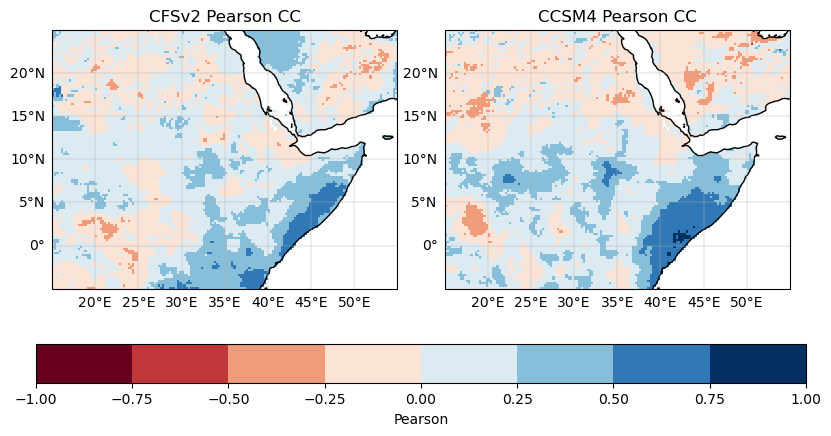

In [9]:
pearsons = []

for j in range(len(predictor_names)):
    pearson = xc.Pearson(Model_hindcast.isel(M=j).expand_dims({'M':[0]}), obs)
    pearsons.append(pearson)
pearsons = xr.concat(pearsons, 'M')

#plotting

xplot = pearsons.plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},  cbar_kwargs={'orientation':'horizontal','ticks':np.linspace(-1,1,9)},cmap=plt.get_cmap('RdBu',8),vmin=-1,vmax=1,figsize=(8,4))


for i, ax in enumerate(xplot.axes.flat):
    c = ax.coastlines()
    ax.set_title(predictor_names[i] + ' Pearson CC')
    c = ax.gridlines(draw_labels=True, linewidth=0.3)
    c.right_labels=False
    c.top_labels=False

### Plot Spearman's Correlation Coeffcient

/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/1358515032.py:14: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(xplot.axes.flat):


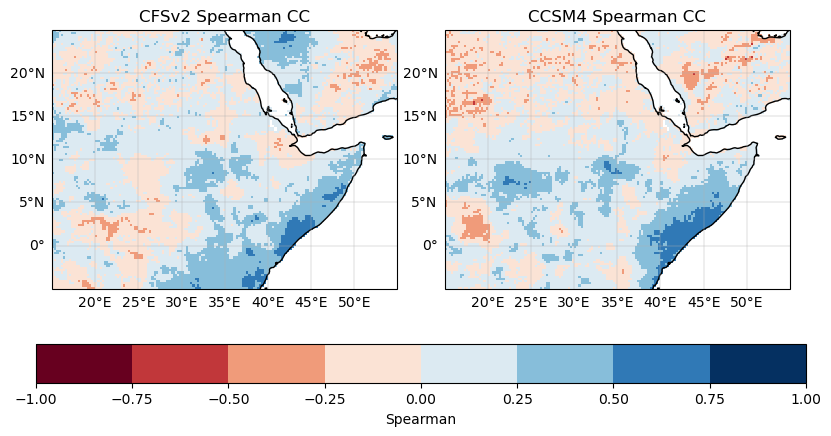

In [10]:
Spearmans = []

for j in range(len(predictor_names)):
    Spearman = xc.Spearman(Model_hindcast.isel(M=j).expand_dims({'M':[0]}), obs)
    Spearmans.append(Spearman)
Spearmans = xr.concat(Spearmans, 'M')

##plotting


        
xplot = Spearmans.plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},  cbar_kwargs={'orientation':'horizontal','ticks':np.linspace(-1,1,9)},cmap=plt.get_cmap('RdBu',8),vmin=-1,vmax=1,figsize=(8,4))

for i, ax in enumerate(xplot.axes.flat):
    c = ax.coastlines()
    ax.set_title(predictor_names[i] + ' Spearman CC')
    c = ax.gridlines(draw_labels=True, linewidth=0.3)
    c.right_labels=False
    c.top_labels=False

### Plot Index of Agreement

for formula of Index of Agrement, see here https://agrimetsoft.com/calculators/Index%20of%20Agreement

/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/2235639090.py:12: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(xplot.axes.flat):


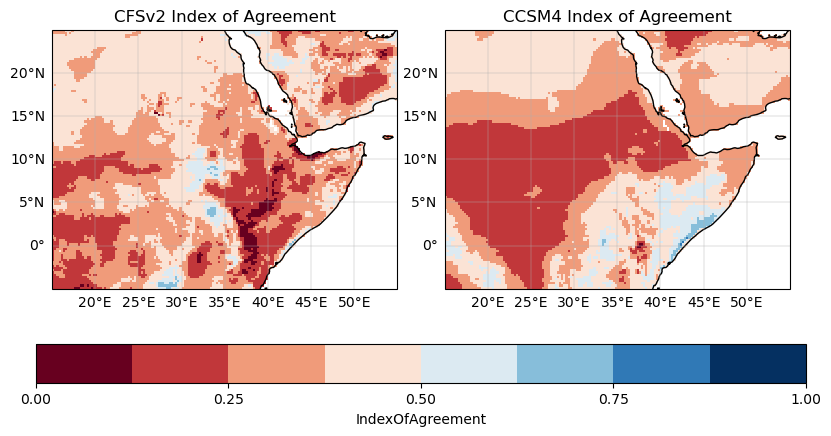

In [11]:
IOA = []

for j in range(len(predictor_names)):
    ioa = xc.IndexOfAgreement(Model_hindcast.isel(M=j).expand_dims({'M':[0]}), obs)
    IOA.append(ioa)
IOA = xr.concat(IOA, 'M')

        
xplot = IOA.plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},  cbar_kwargs={'orientation':'horizontal','ticks':np.linspace(-1,1,9)},cmap=plt.get_cmap('RdBu',8),vmin=0,vmax=1,figsize=(8,4))


for i, ax in enumerate(xplot.axes.flat):
    c = ax.coastlines()
    ax.set_title(predictor_names[i] + ' Index of Agreement')
    c = ax.gridlines(draw_labels=True, linewidth=0.3)
    c.right_labels=False
    c.top_labels=False

### Plot Kling Gupta Efficiency

for formula of Kling Gupta Efficiency,see here https://agrimetsoft.com/calculators/Kling-Gupta%20efficiency

/var/folders/nj/z_nlnhcn2v7fp_twb8nq_6mr0000gn/T/ipykernel_26004/3160153045.py:12: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(xplot.axes.flat):


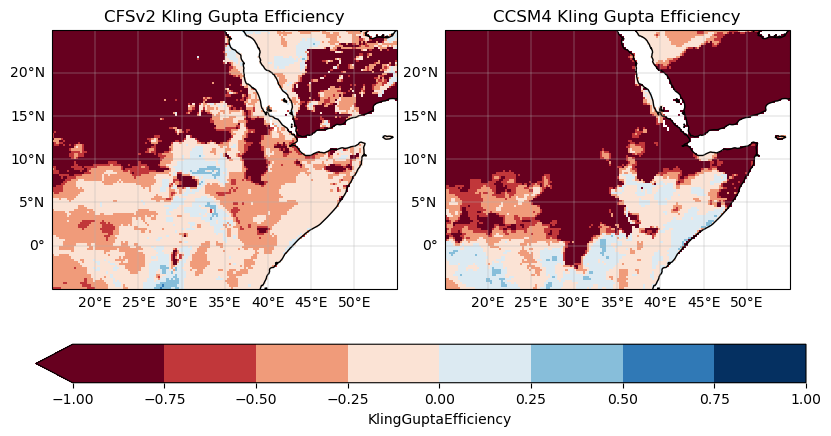

In [12]:
KGE = []

for j in range(len(predictor_names)):
    kge = xc.KlingGuptaEfficiency(Model_hindcast.isel(M=j).expand_dims({'M':[0]}), obs)
    KGE.append(kge)
KGE = xr.concat(KGE, 'M')


xplot = KGE.plot(col='M',col_wrap=2, subplot_kws={'projection': ccrs.PlateCarree()},  cbar_kwargs={'orientation':'horizontal','ticks':np.linspace(-1,1,9)},cmap=plt.get_cmap('RdBu',8),vmin=-1,vmax=1,figsize=(8,4))


for i, ax in enumerate(xplot.axes.flat):
    c = ax.coastlines()
    ax.set_title(predictor_names[i] + ' Kling Gupta Efficiency')
    c = ax.gridlines(draw_labels=True, linewidth=0.3)
    c.right_labels=False
    c.top_labels=False

### Taylor Diagram of GCMs

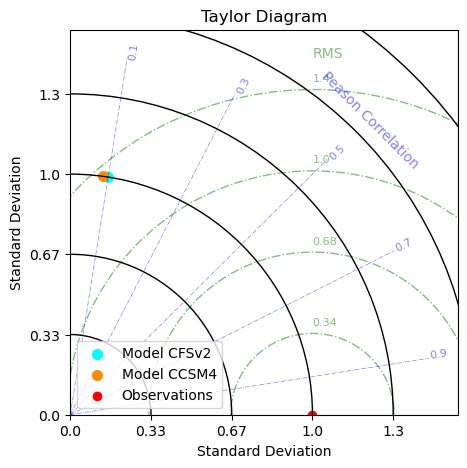

In [13]:
Obs =(obs-obs.mean('T'))/obs.std('T')
Models =(Model_hindcast-Model_hindcast.mean('S'))/Model_hindcast.std('S')

xc.view_taylor(Models, Obs)